In [14]:
from sklearn.model_selection import KFold, train_test_split
from algorithms.Adaboost import AdaBoost
from algorithms.AdaBoost_RandomForest import AdaBoost_RandomForest
import matplotlib.pyplot as plt
from utils_final import *

### Obter datasets do OpenML




In [2]:
list_num_dataset_id = [1464, 1067, 1467, 1504, 1494, 1068, 1471, 44, 1046, 1050, 1462, 151, 1485, 1461]

dataframes = {}

for dataset_id in list_num_dataset_id:
    df = obter_dataset(dataset_id)
    dataframes[dataset_id] = df

/Users/marisa/Library/CloudStorage/GoogleDrive-marisapsazevedo@gmail.com/My Drive/Faculdade/3ºAno/2ºSemestre/Aprendizagem Computacional I/Trabalho/ML1/utils_final.py:18: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, attrs = dataset.get_data(dataset_format="array", target=dataset.default_target_attribute)
/Users/marisa/Library/CloudStorage/GoogleDrive-marisapsazevedo@gmail.com/My Drive/Faculdade/3ºAno/2ºSemestre/Aprendizagem Computacional I/Trabalho/ML1/utils_final.py:18: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, attrs = dataset.get_data(dataset_format="array", target=dataset.defaul

### ADABOOST Original

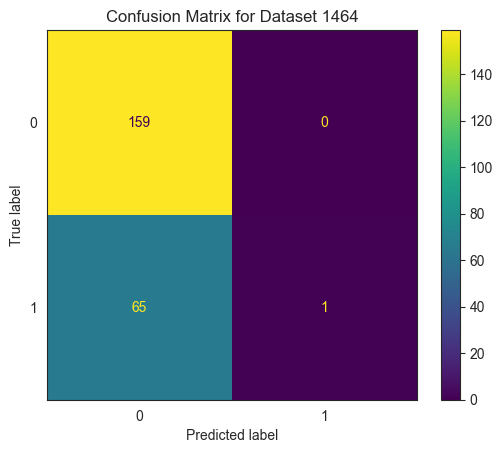

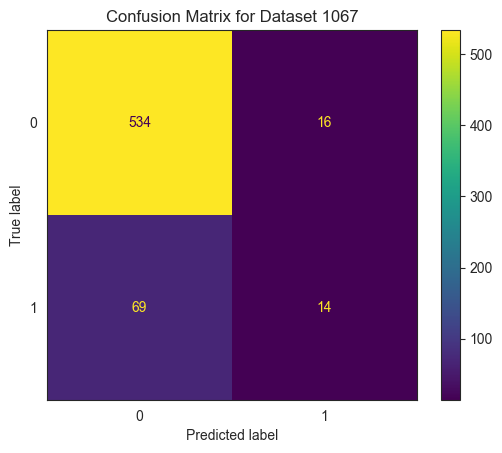

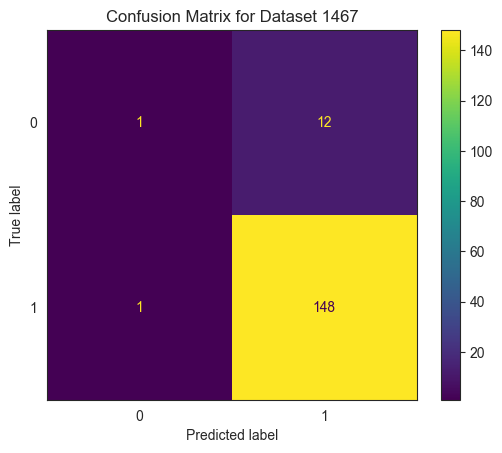

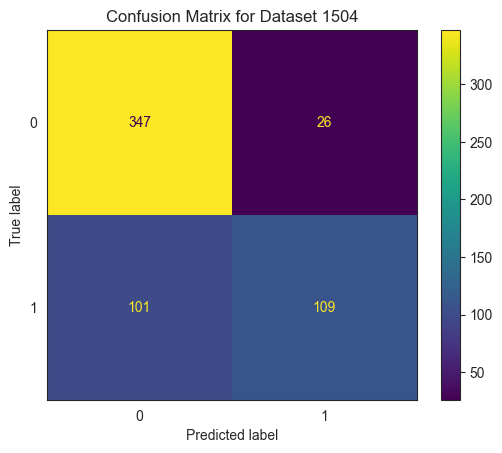

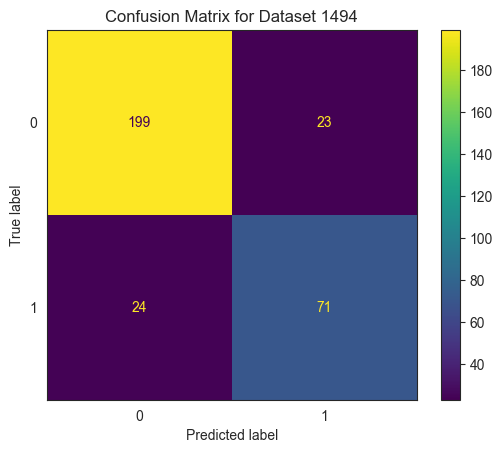

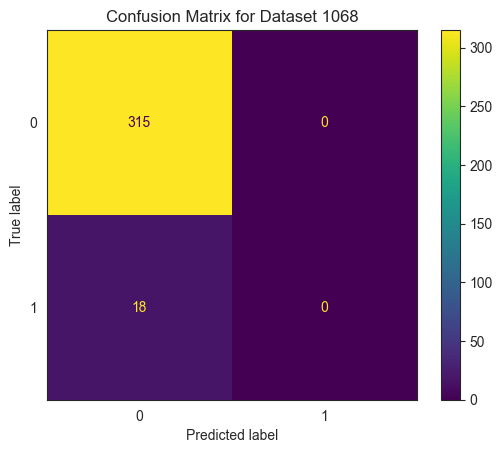

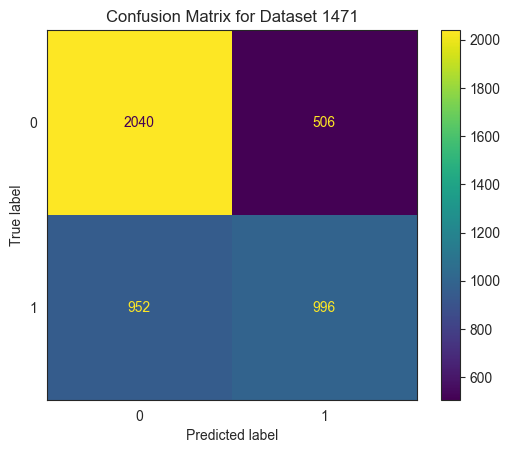

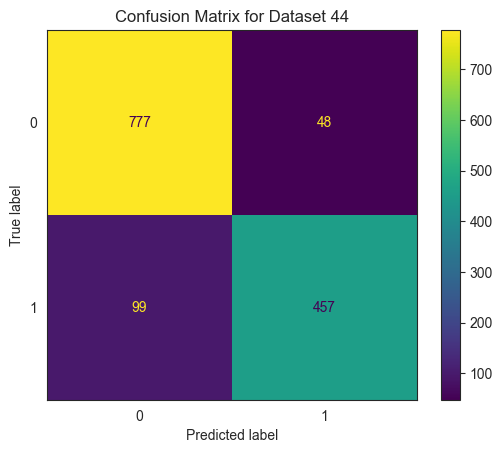

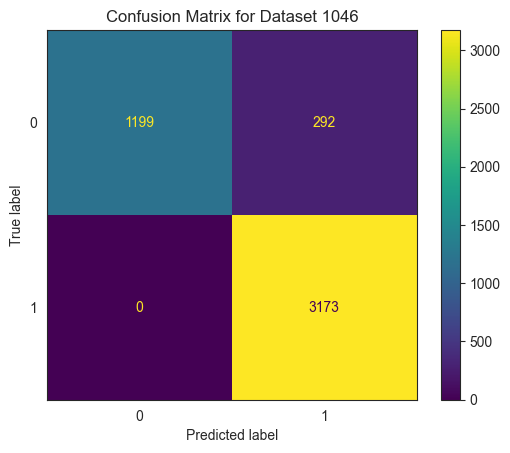

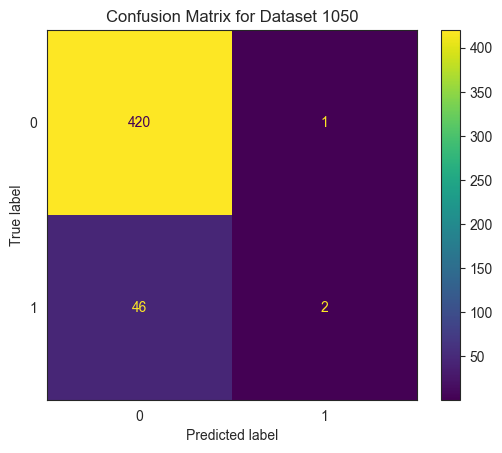

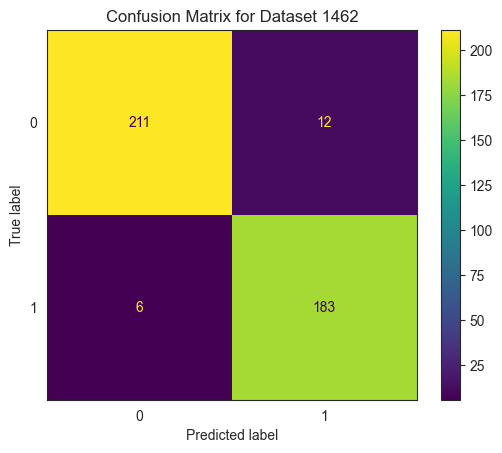

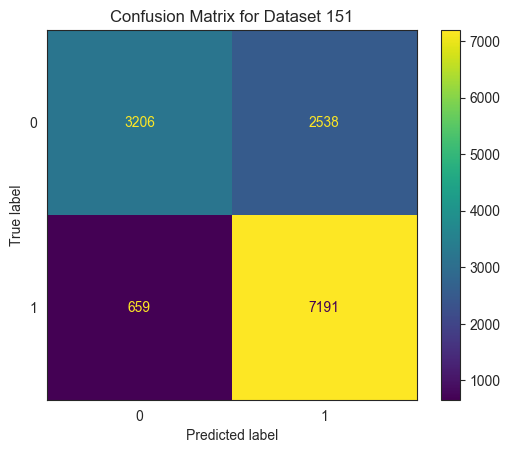

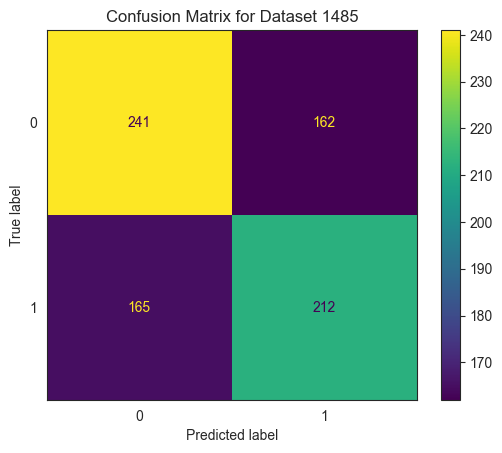

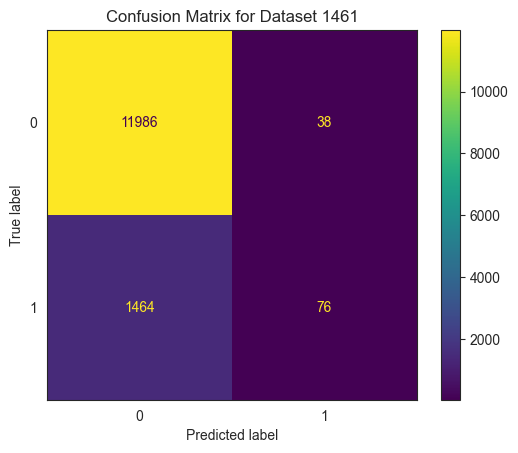

In [3]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost = AdaBoost()
    adaboost.fit(X_train, y_train)
    plot_cm(adaboost, X_test, y_test,id)

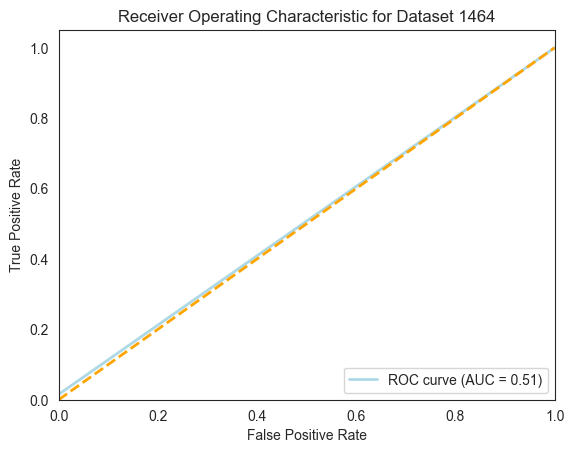

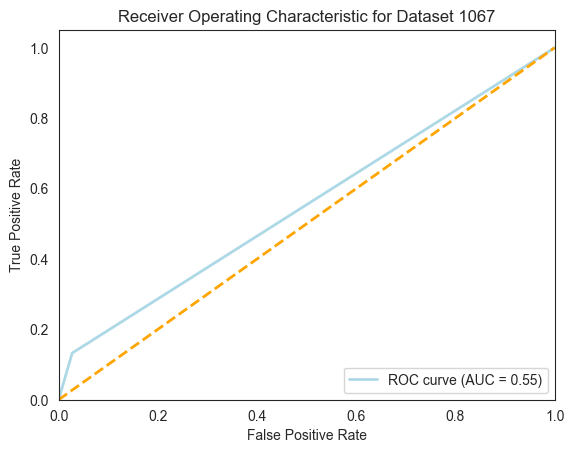

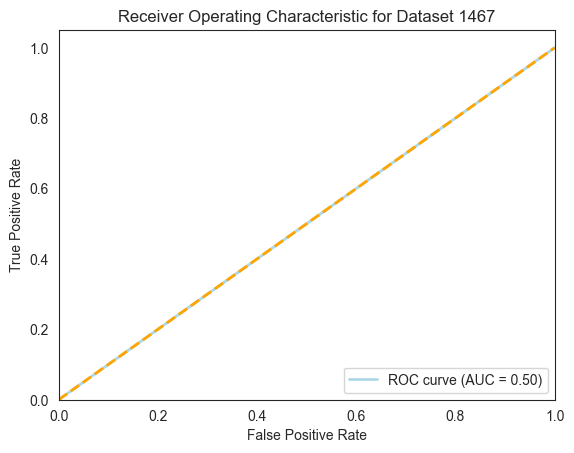

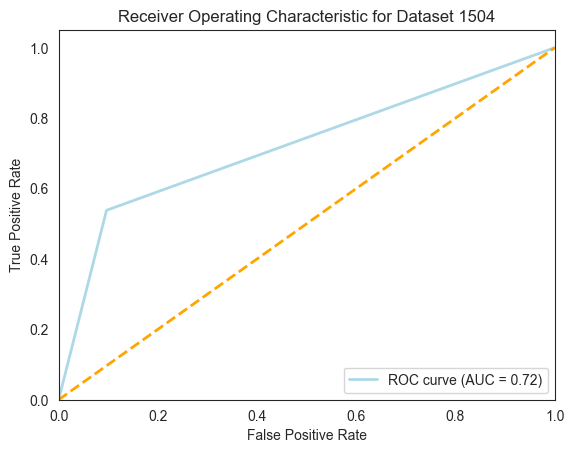

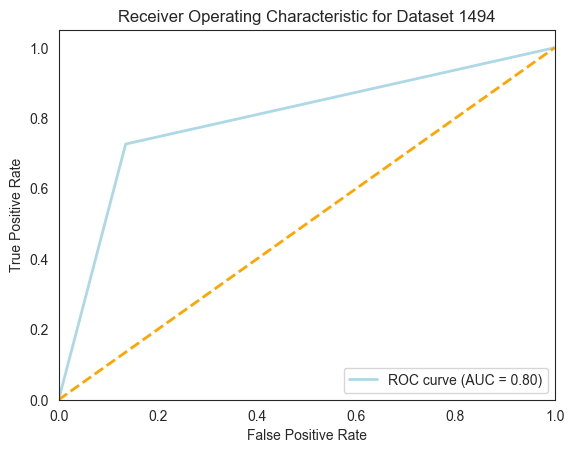

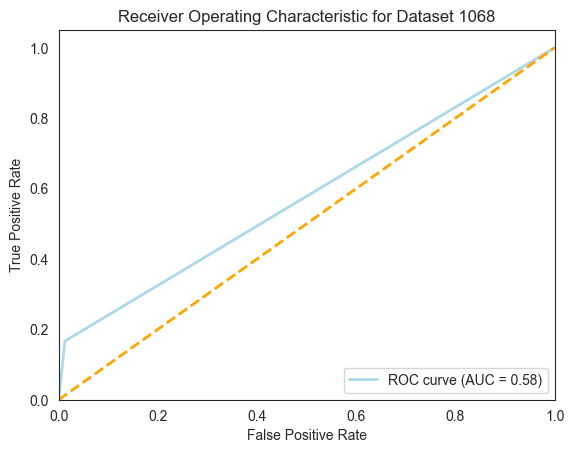

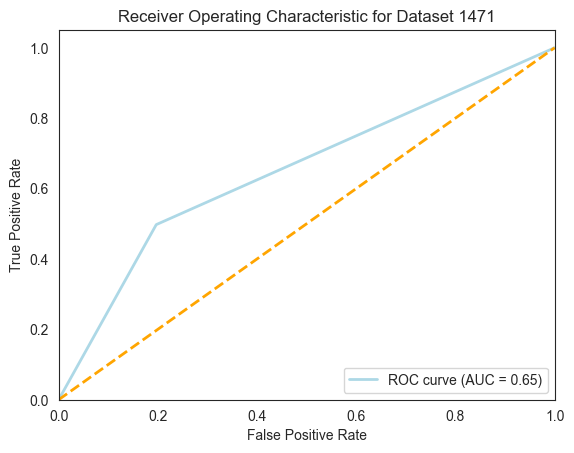

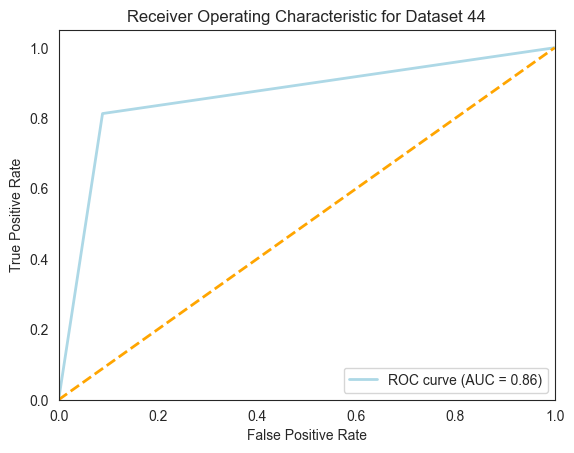

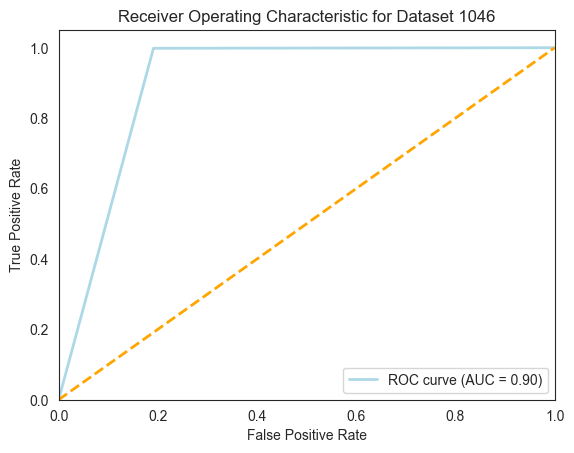

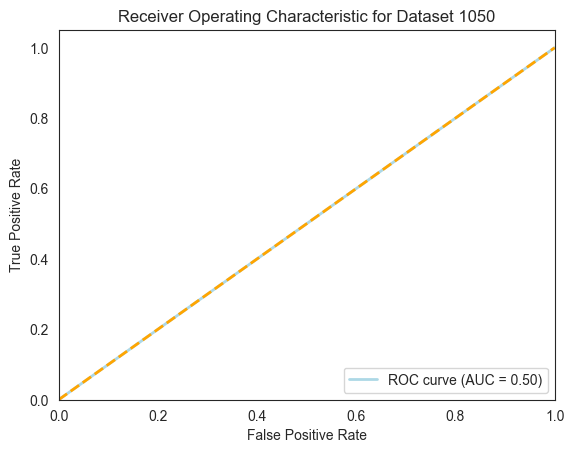

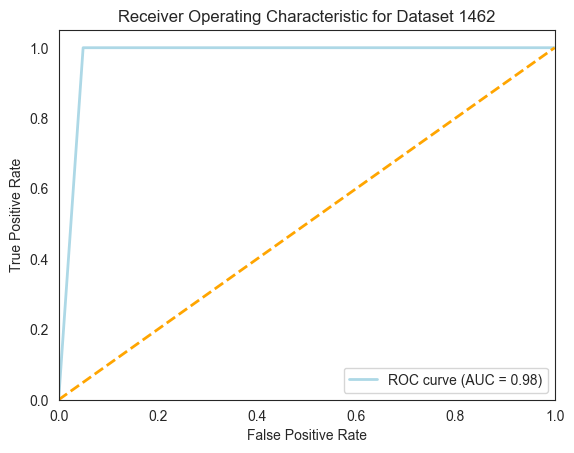

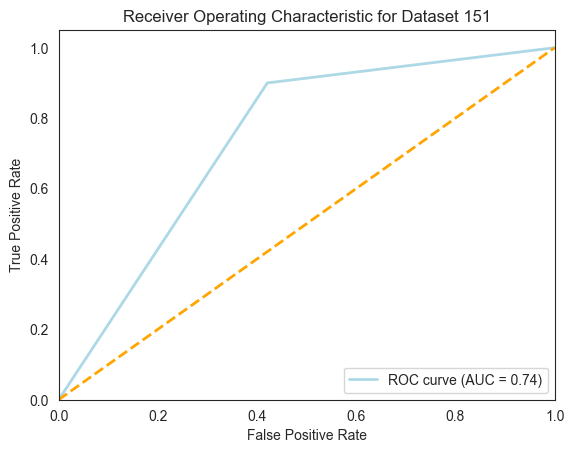

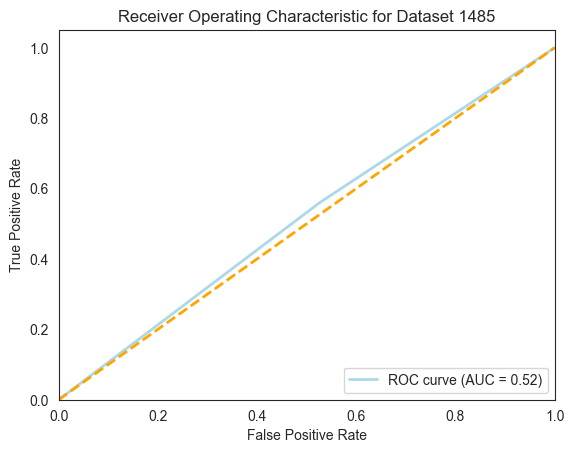

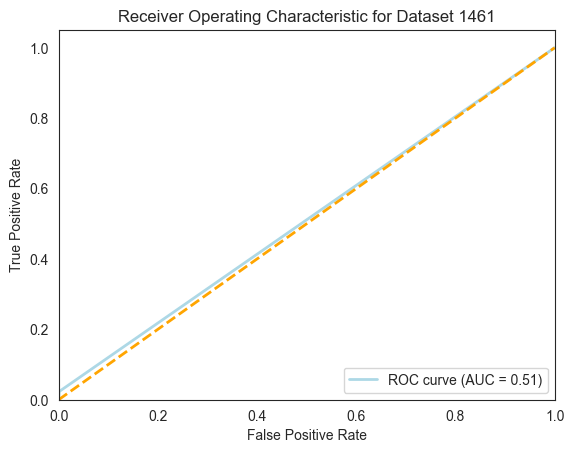

In [4]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost = AdaBoost()
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    plot_roc_curve(y_test, y_pred, id)

### ADABOOST Check Outliers 3

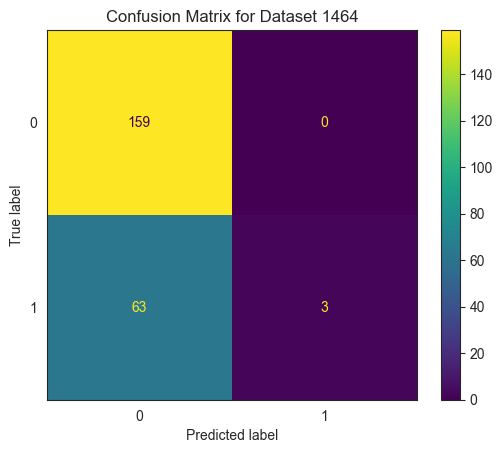

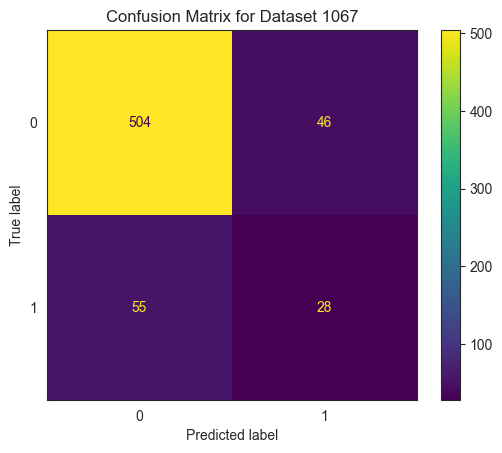

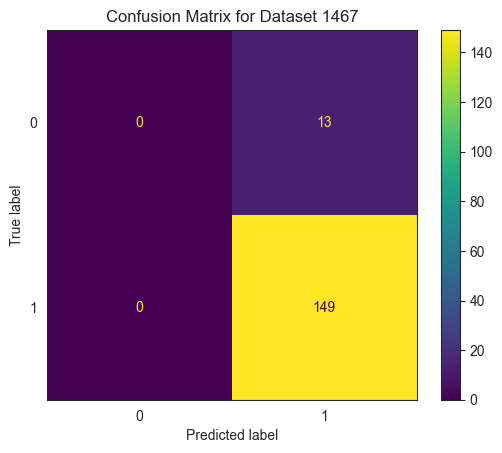

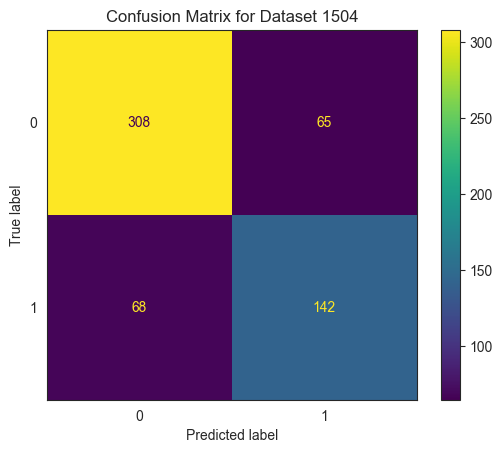

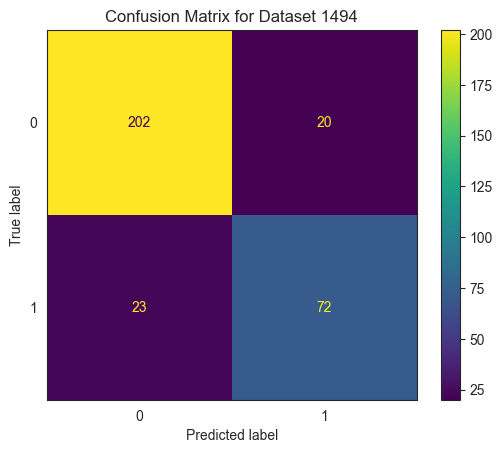

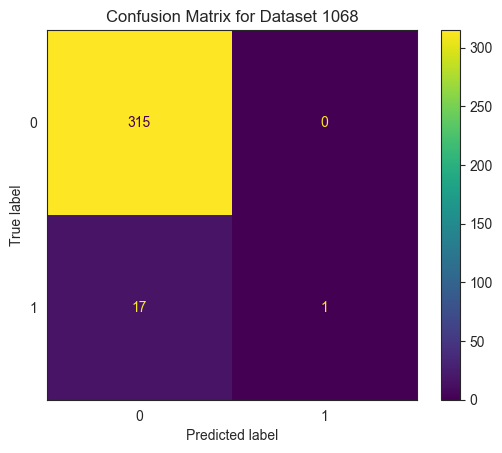

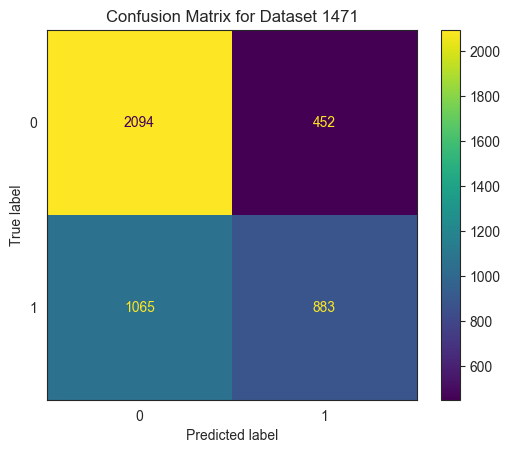

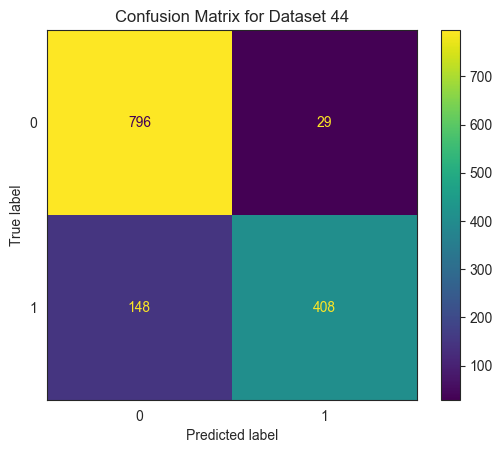

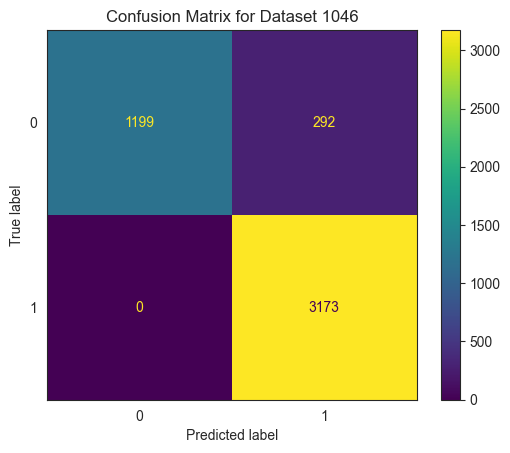

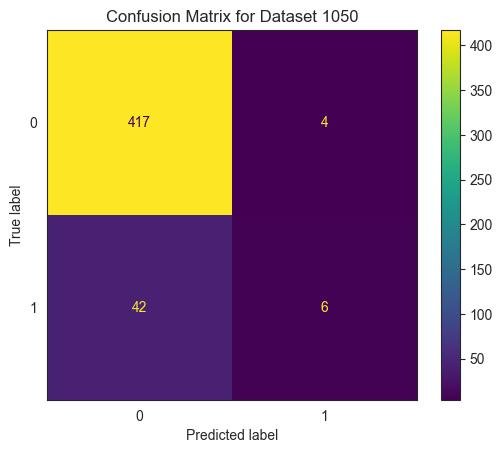

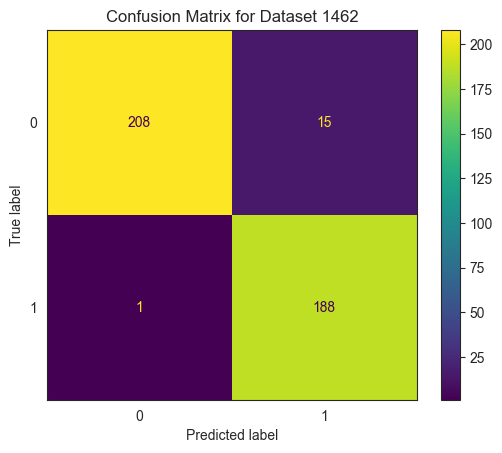

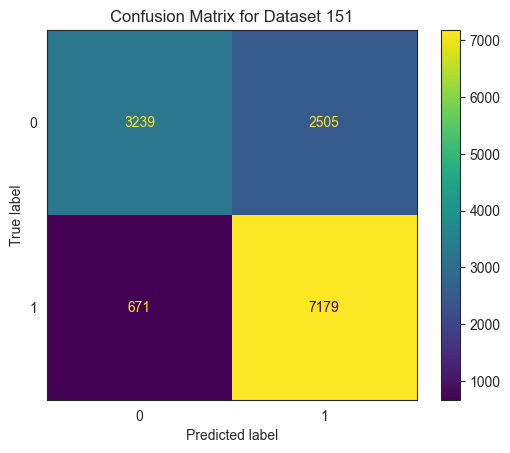

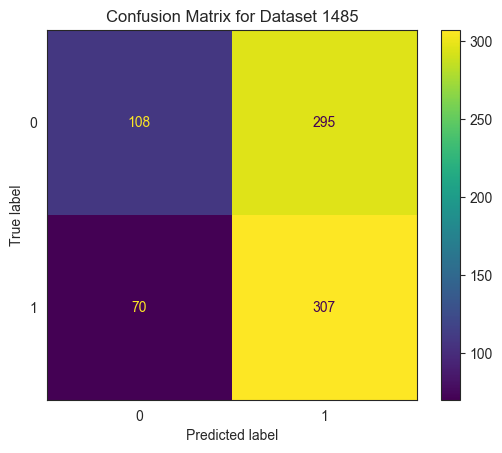

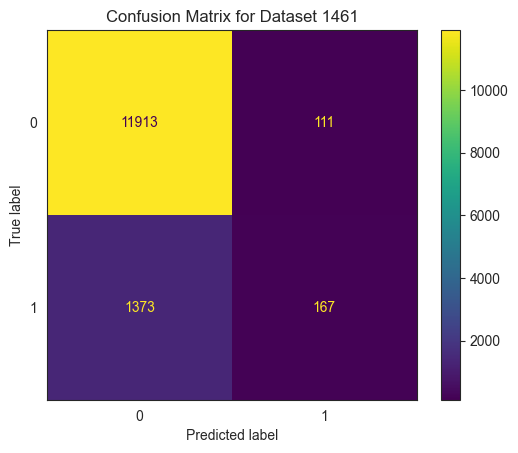

In [5]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost_check3 = AdaBoost(check_outliers=True,outlier_threshold=3)
    adaboost_check3.fit(X_train, y_train)
    plot_cm(adaboost_check3, X_test, y_test,id)

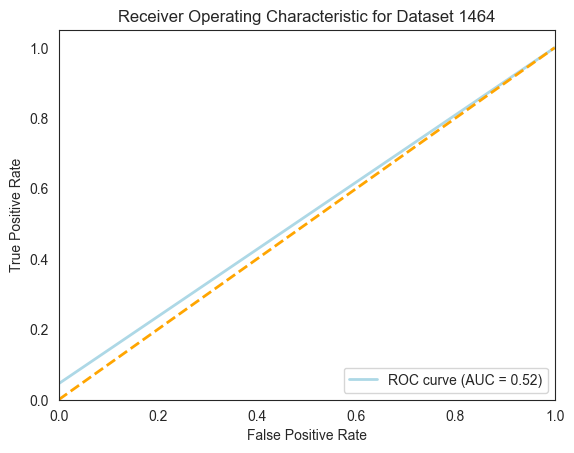

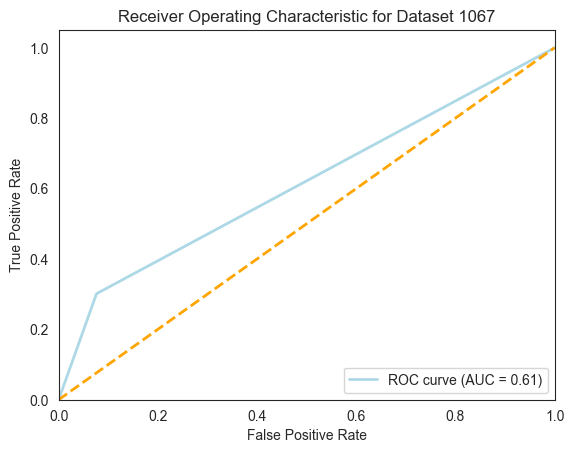

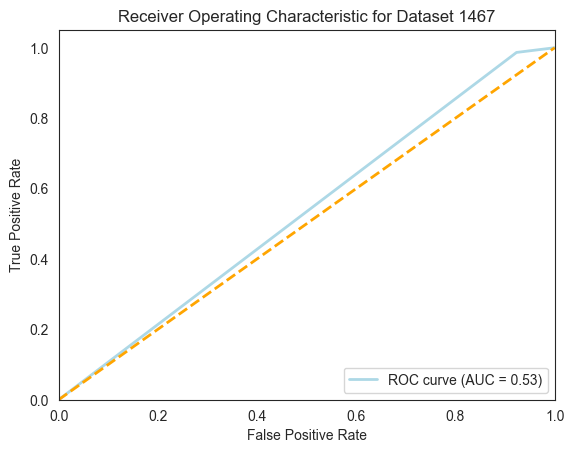

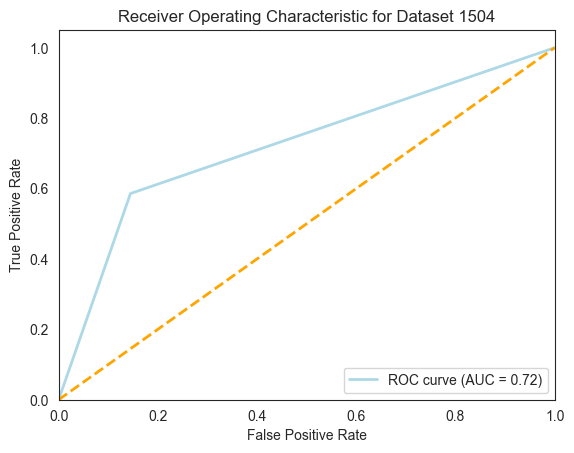

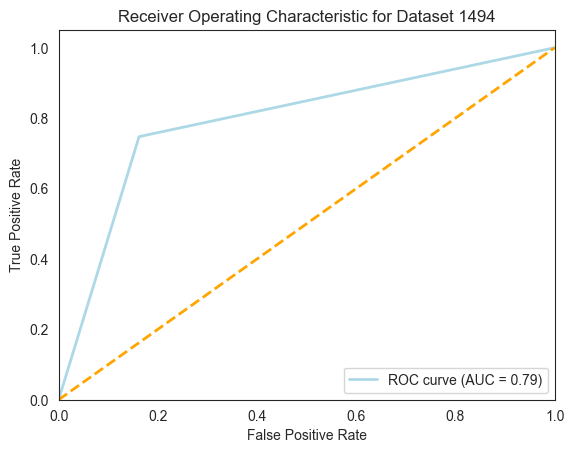

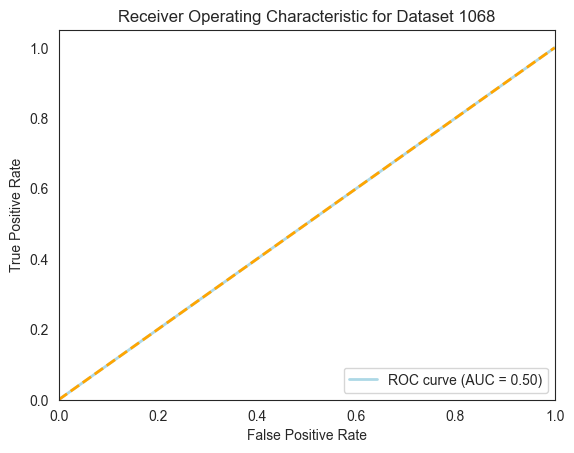

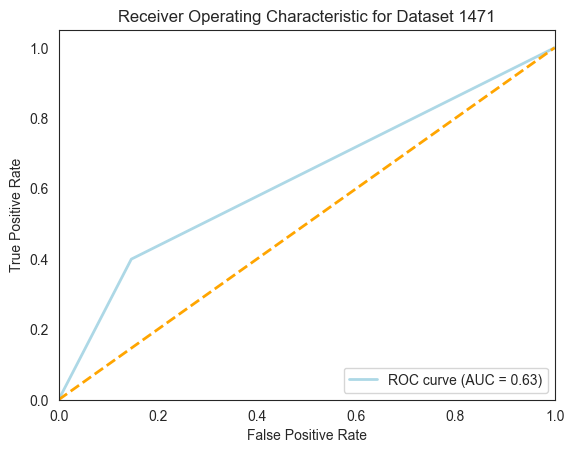

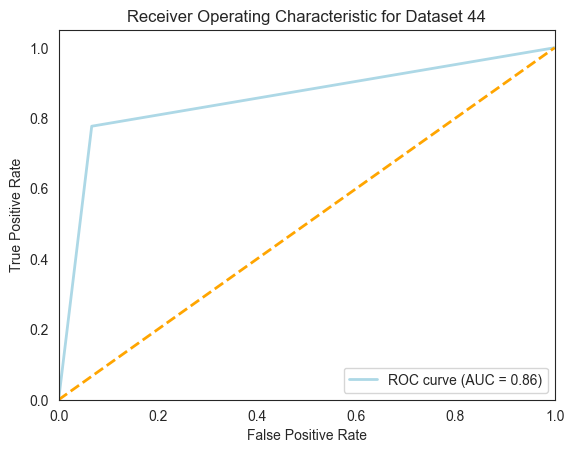

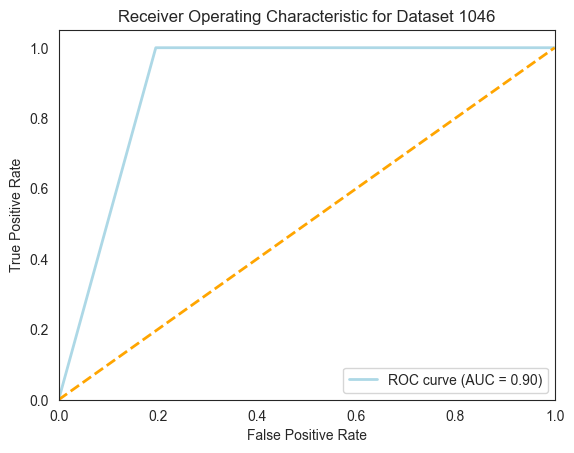

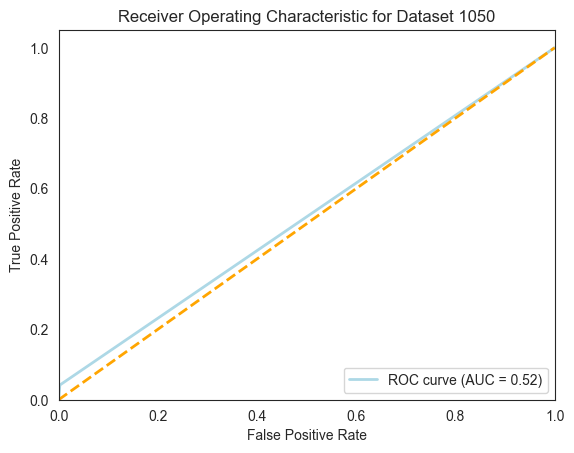

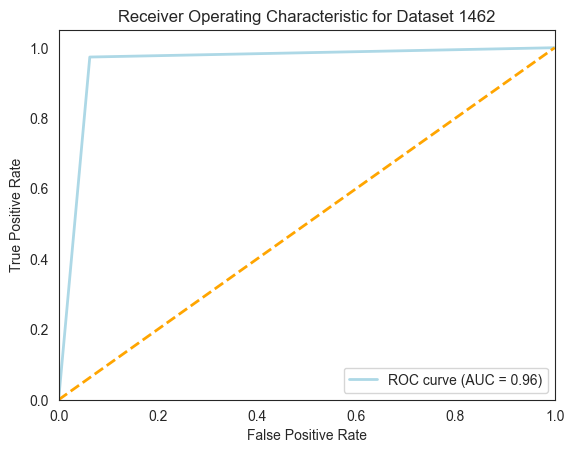

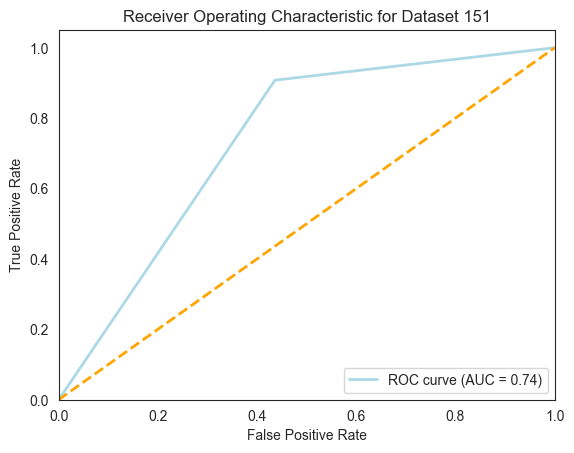

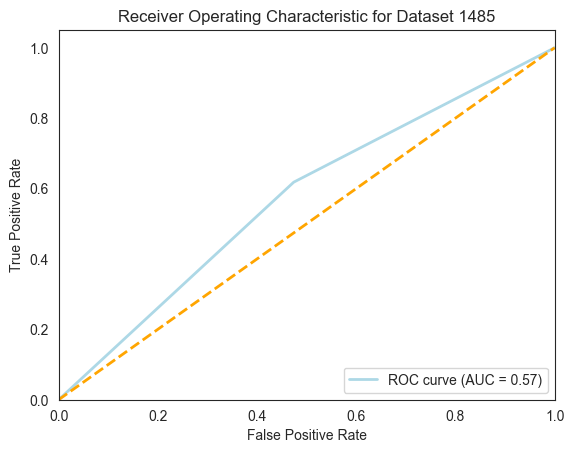

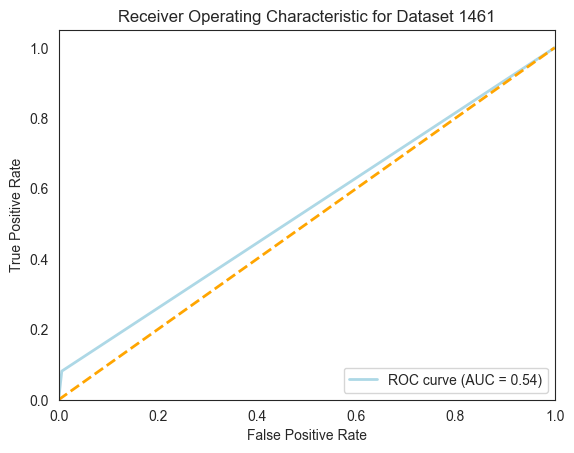

In [6]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost_check3 = AdaBoost(check_outliers=True,outlier_threshold=3)
    adaboost_check3.fit(X_train, y_train)
    y_pred = adaboost_check3.predict(X_test)
    plot_roc_curve(y_test, y_pred, id)

### AdaBoost Check Outliers 5

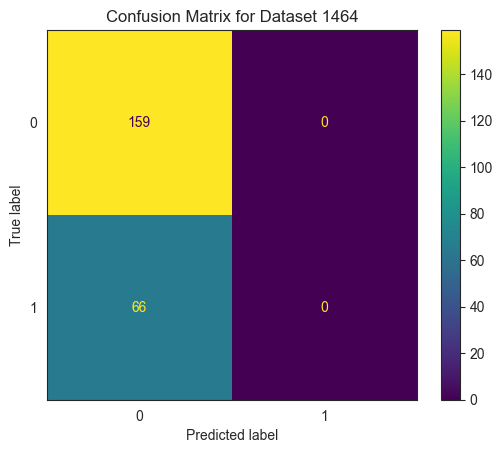

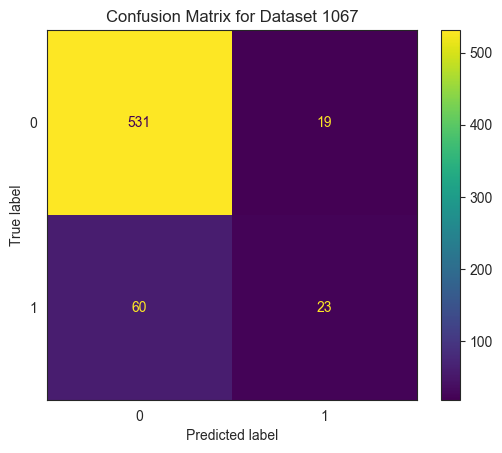

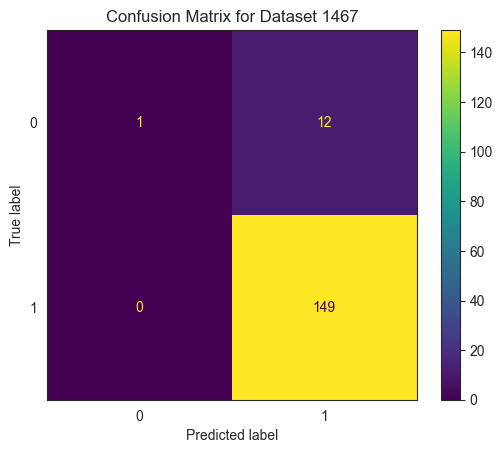

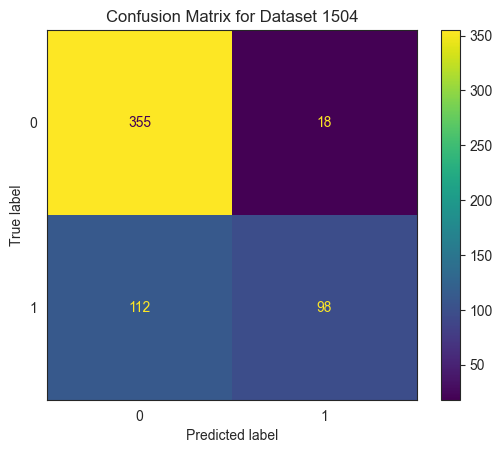

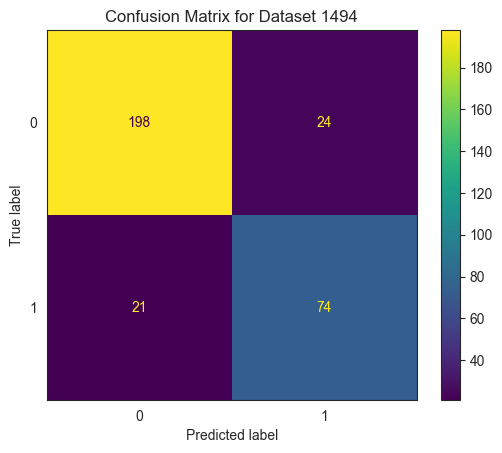

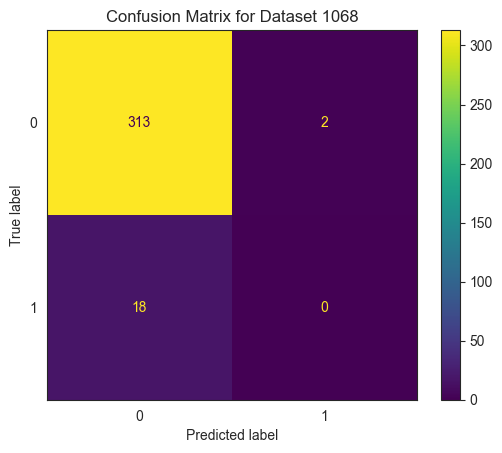

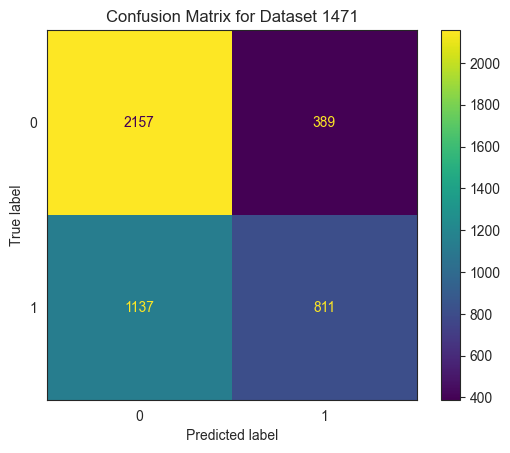

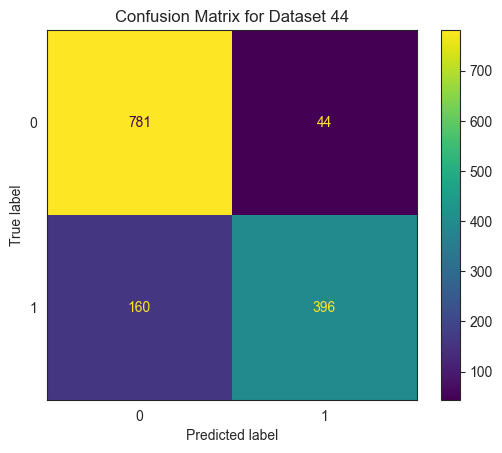

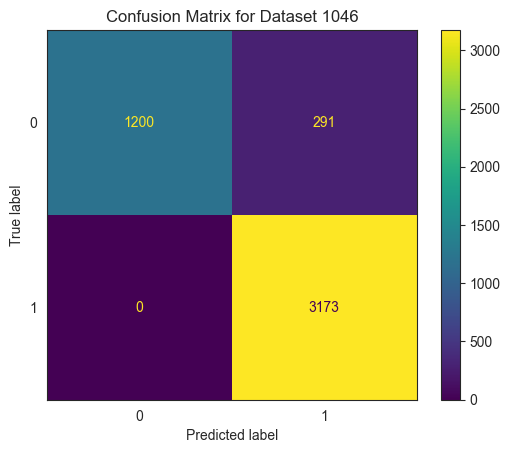

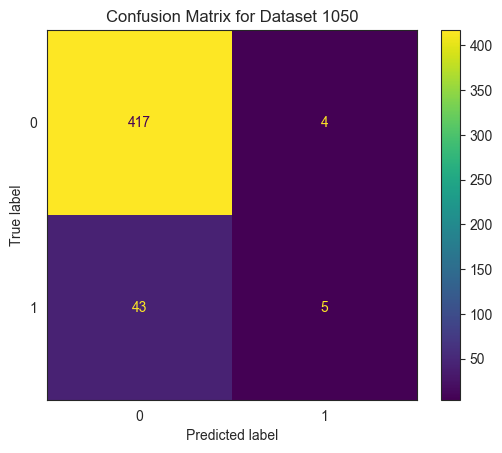

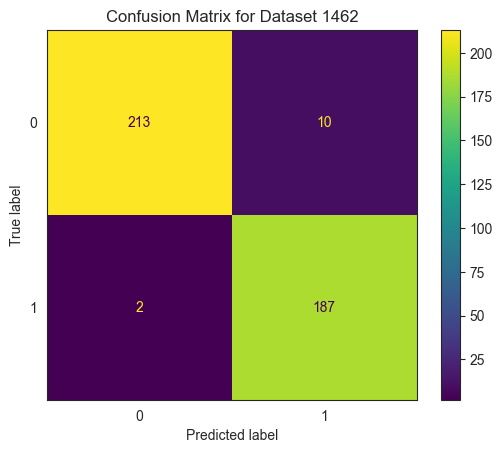

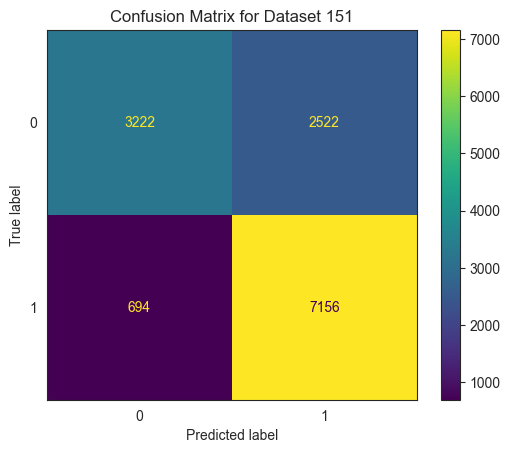

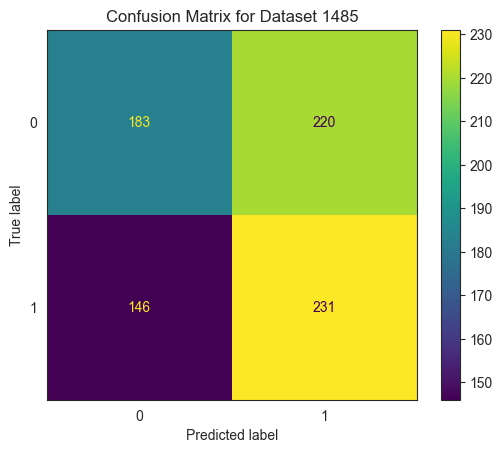

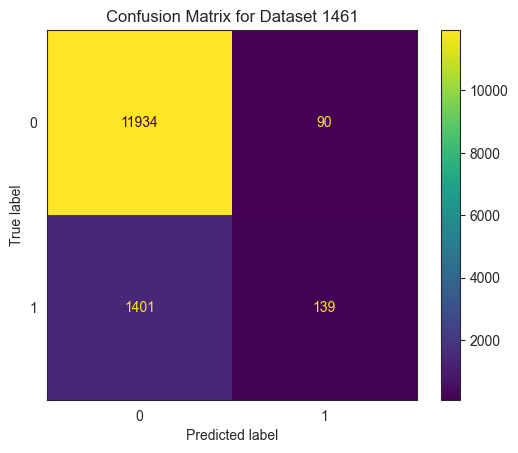

In [7]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost_check3 = AdaBoost(check_outliers=True,outlier_threshold=5)
    adaboost_check3.fit(X_train, y_train)
    plot_cm(adaboost_check3, X_test, y_test,id)

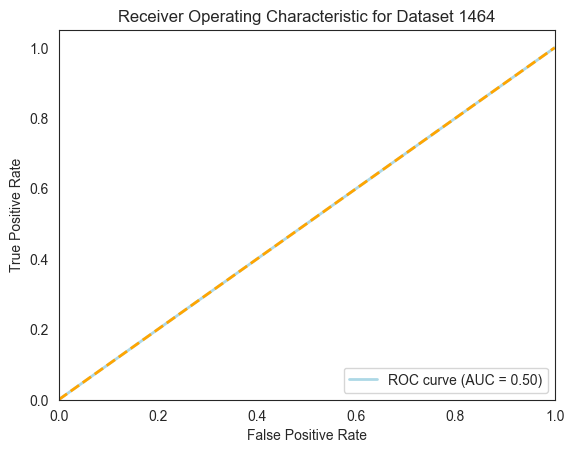

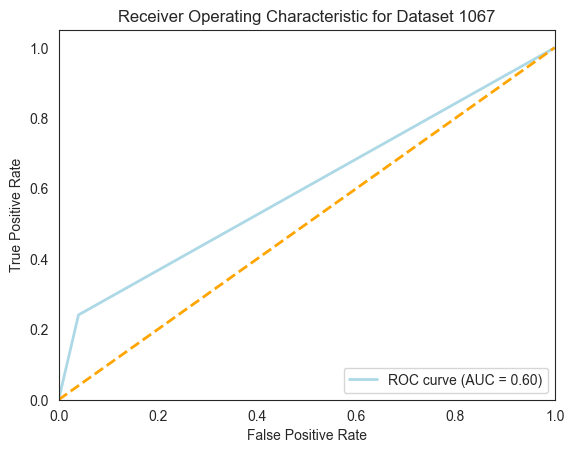

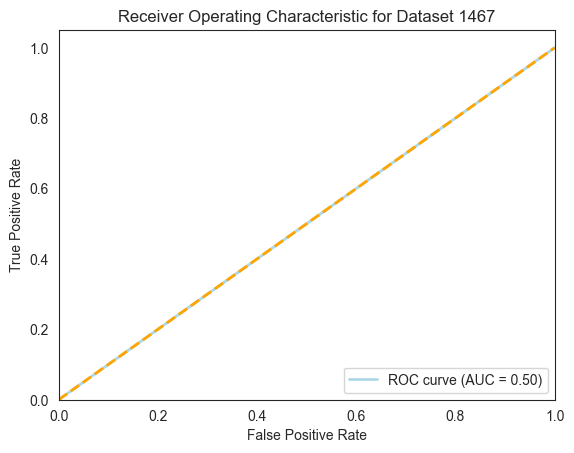

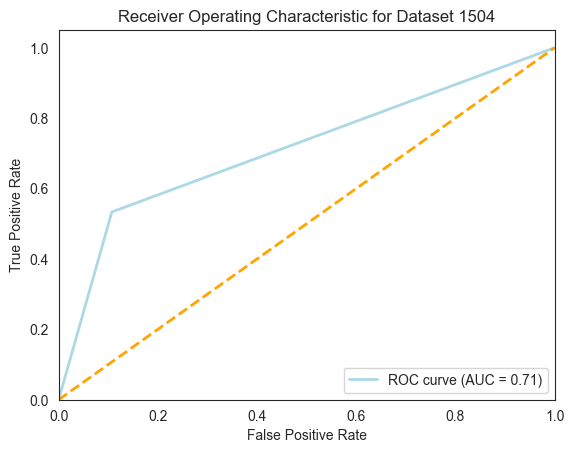

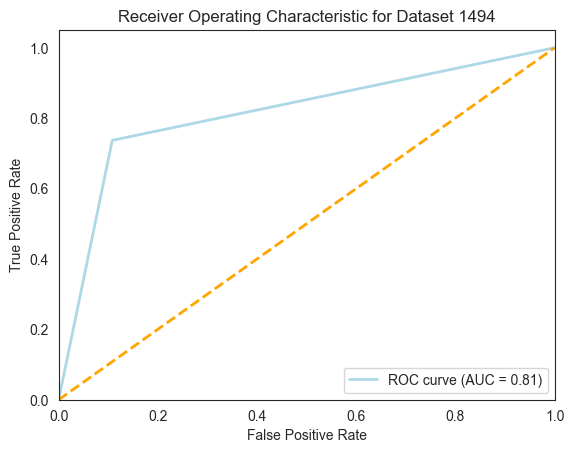

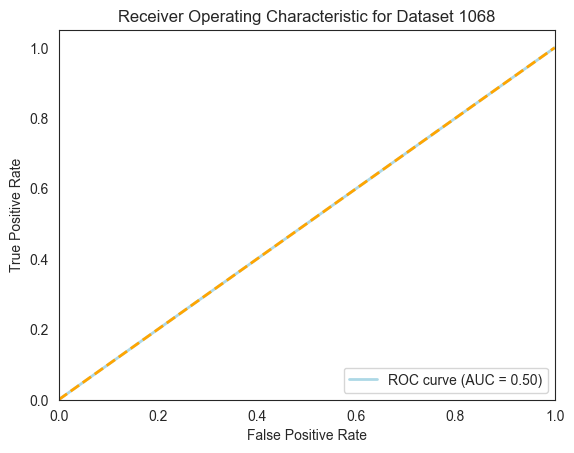

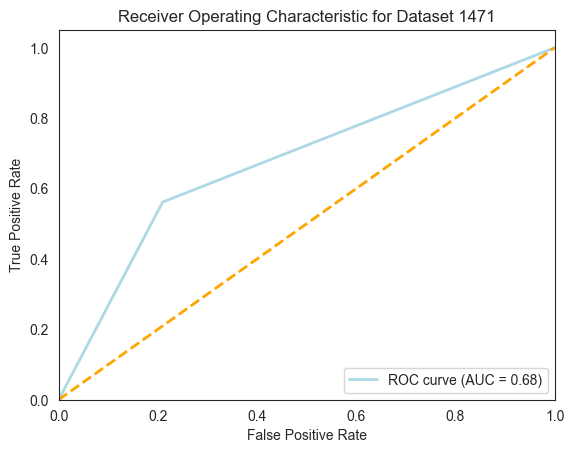

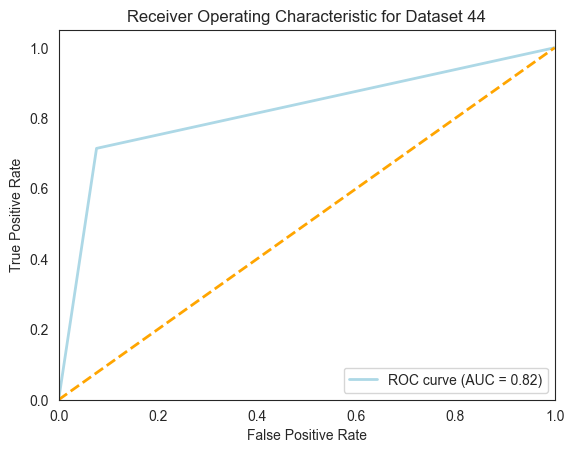

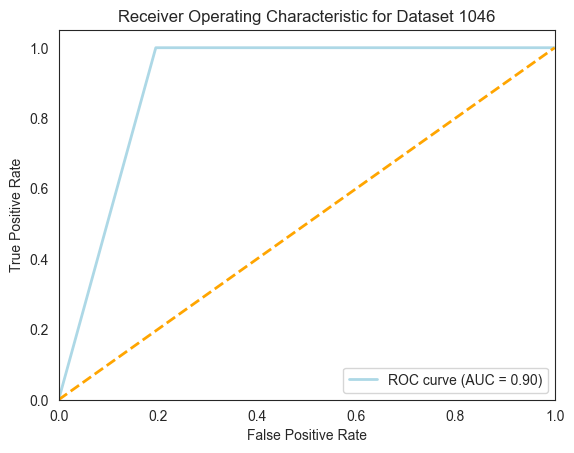

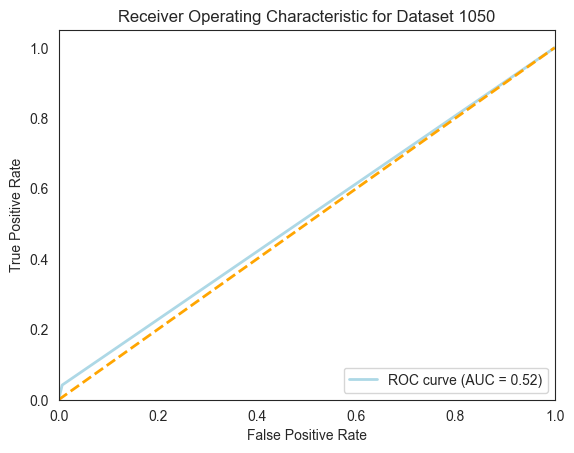

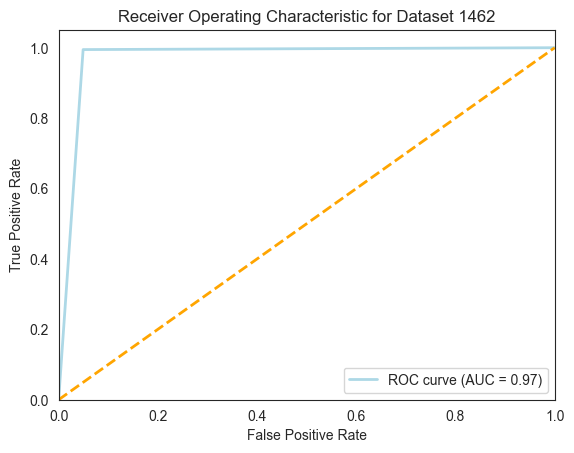

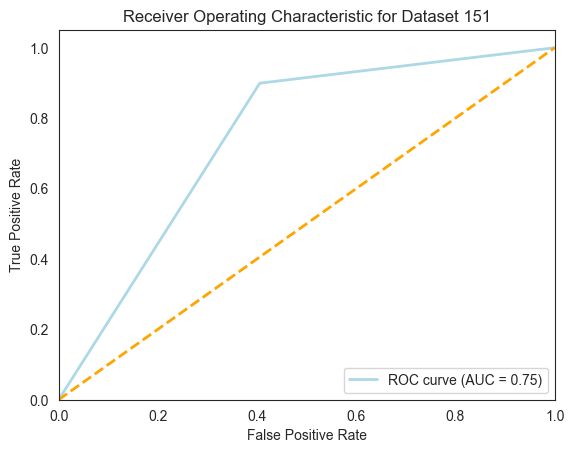

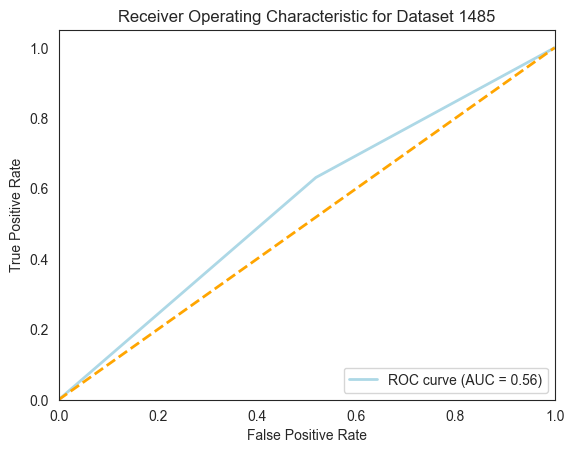

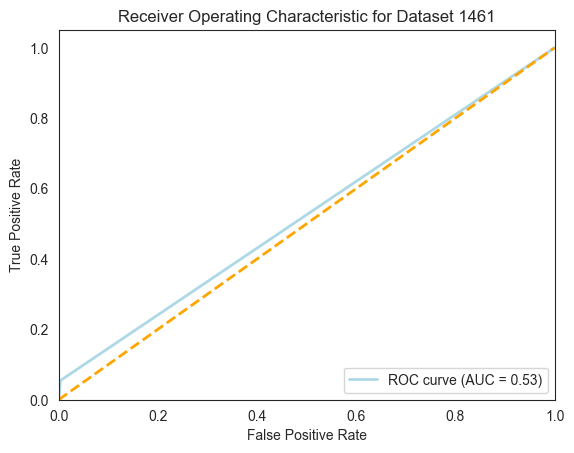

In [8]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost_check3 = AdaBoost(check_outliers=True,outlier_threshold=5)
    adaboost_check3.fit(X_train, y_train)
    y_pred = adaboost_check3.predict(X_test)
    plot_roc_curve(y_test, y_pred, id)

### AdaBoost Random Forest

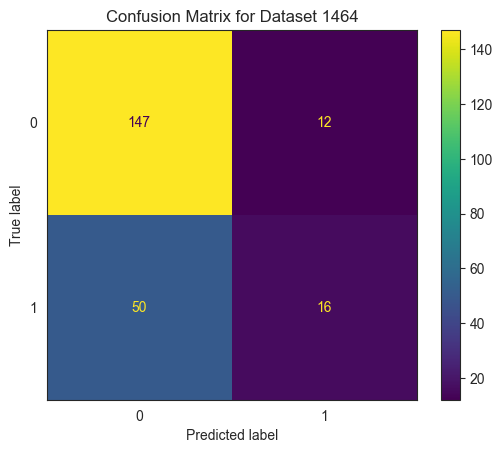

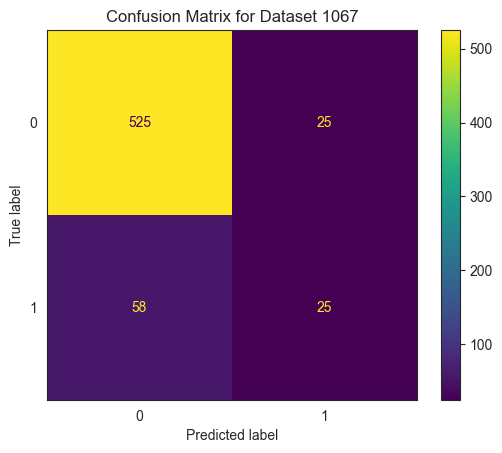

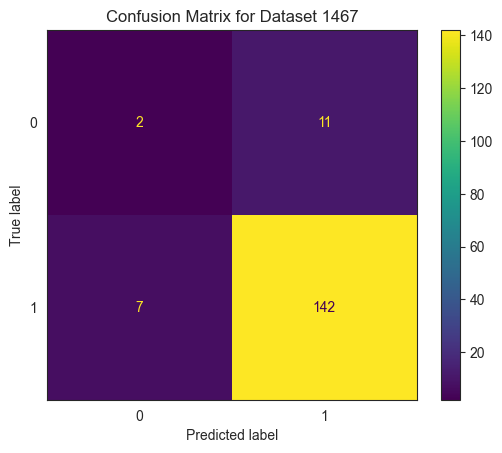

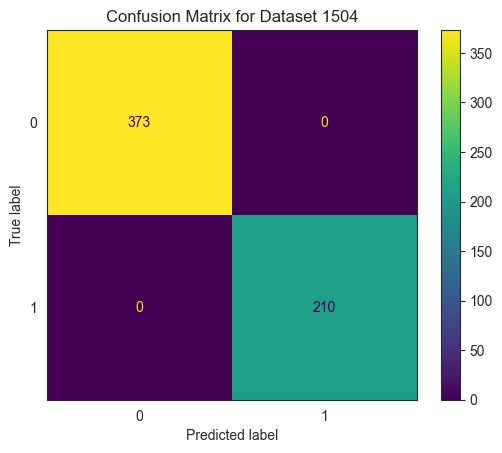

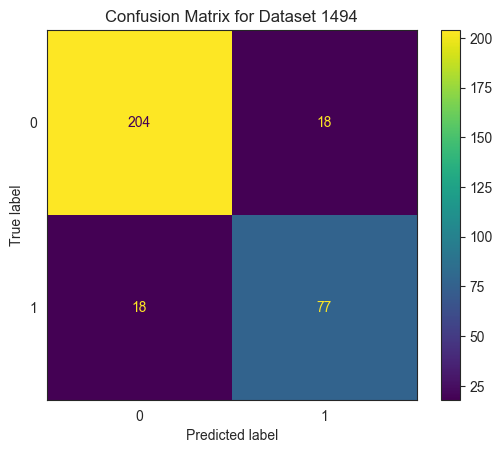

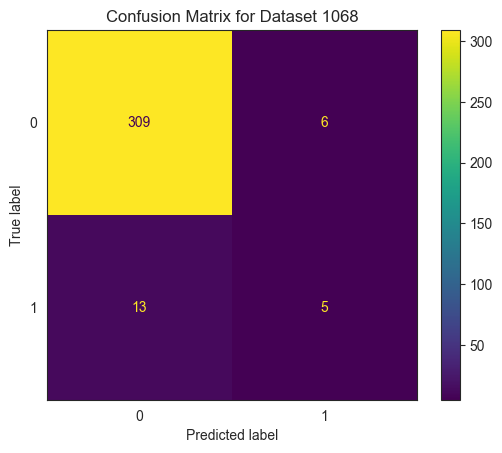

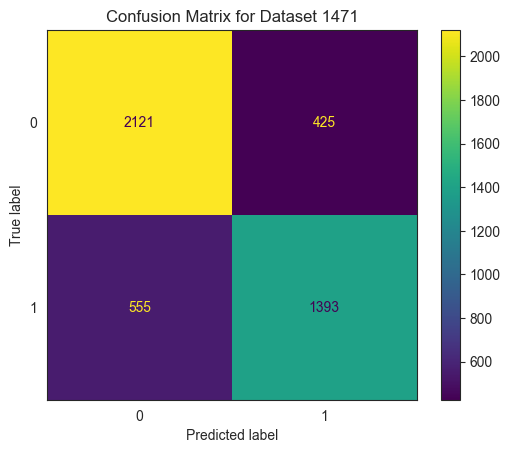

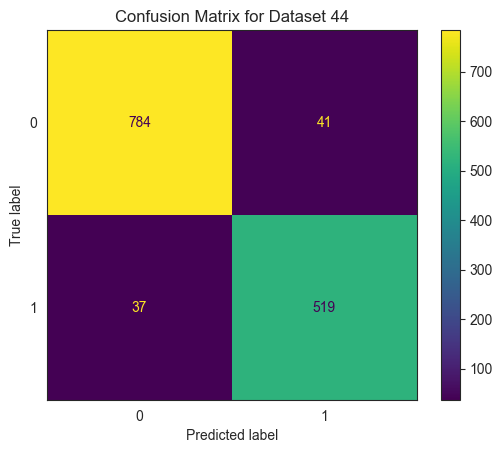

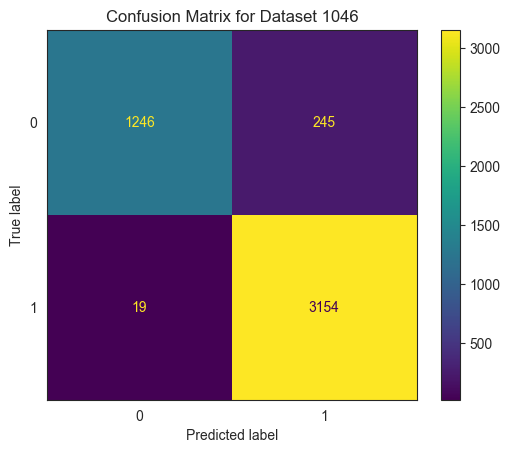

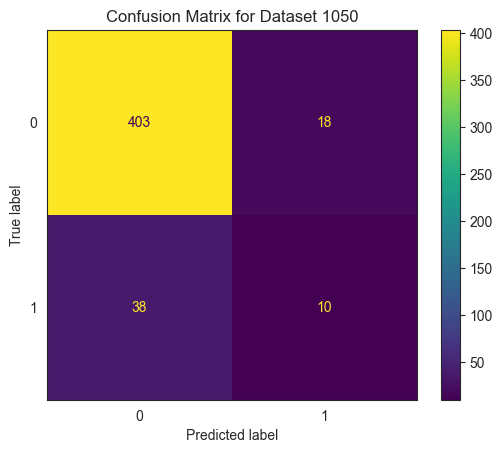

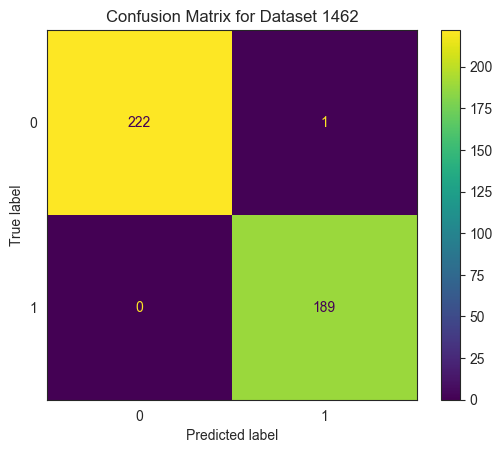

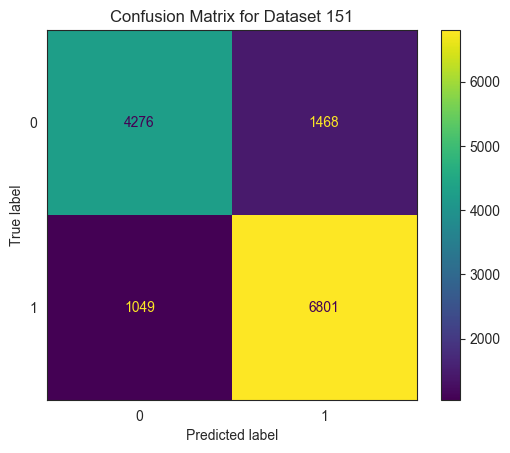

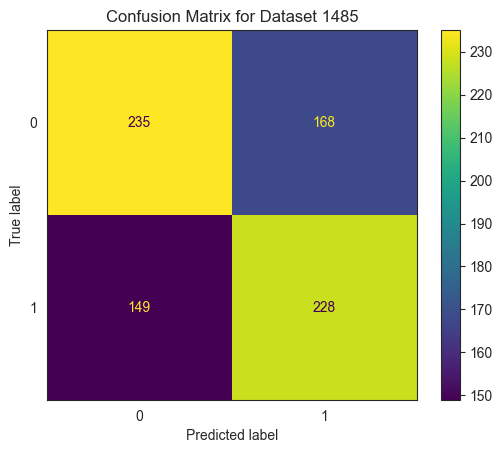

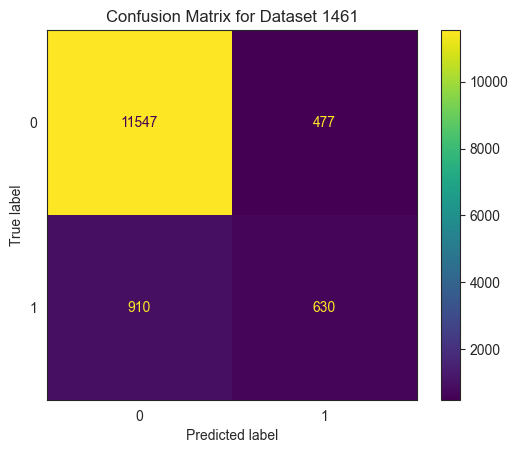

In [12]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost_rf = AdaBoost_RandomForest()
    adaboost_rf.fit(X_train, y_train)
    plot_cm(adaboost_rf, X_test, y_test,id)

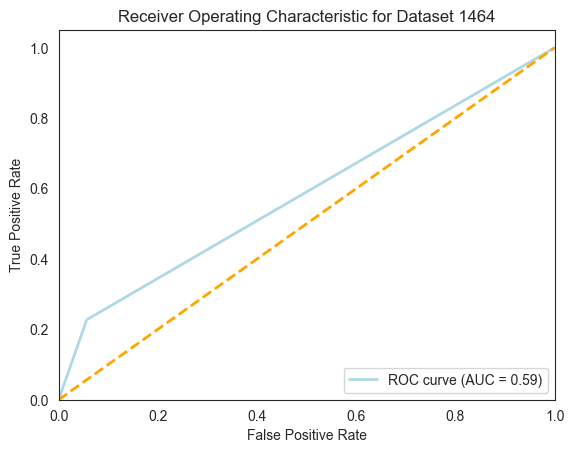

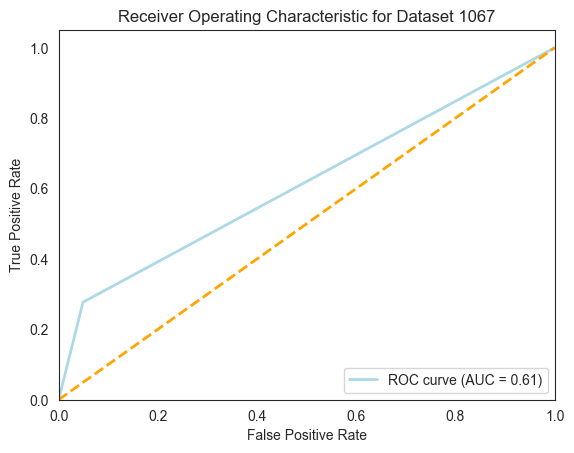

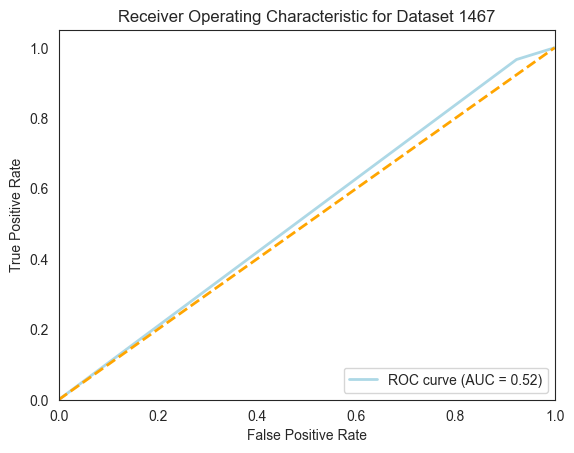

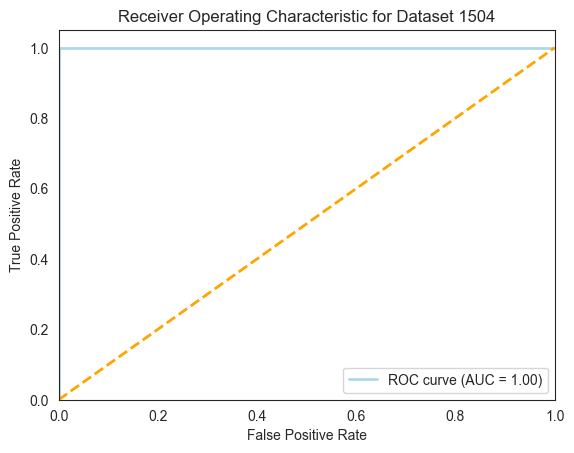

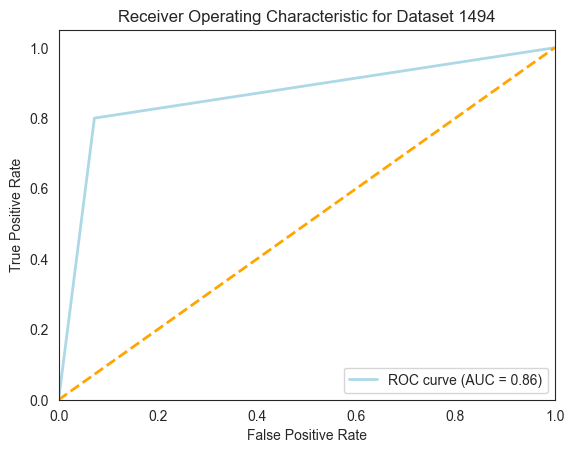

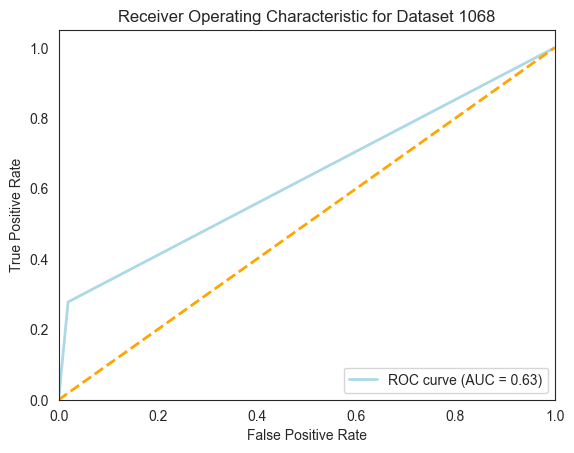

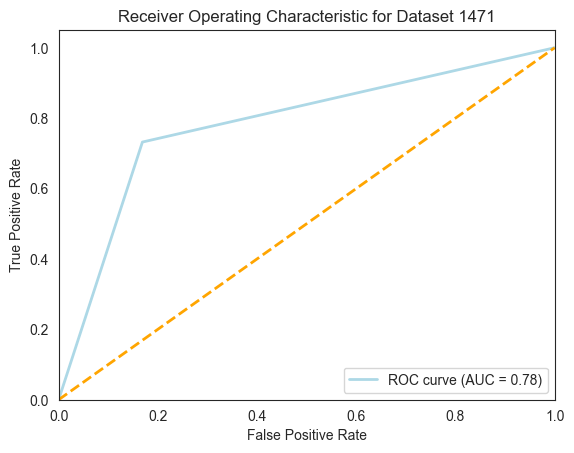

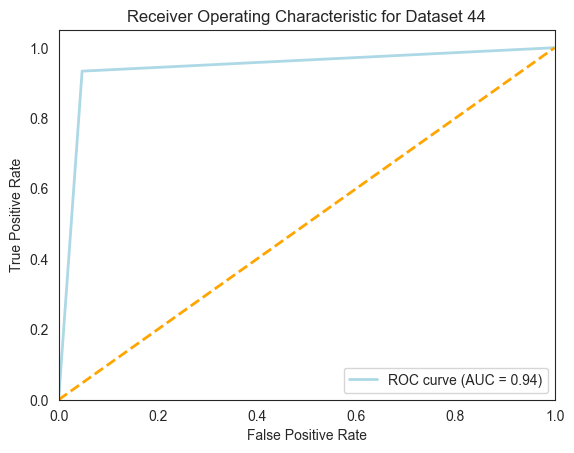

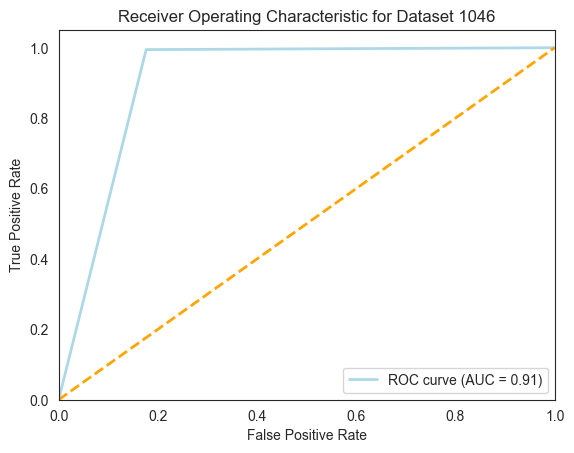

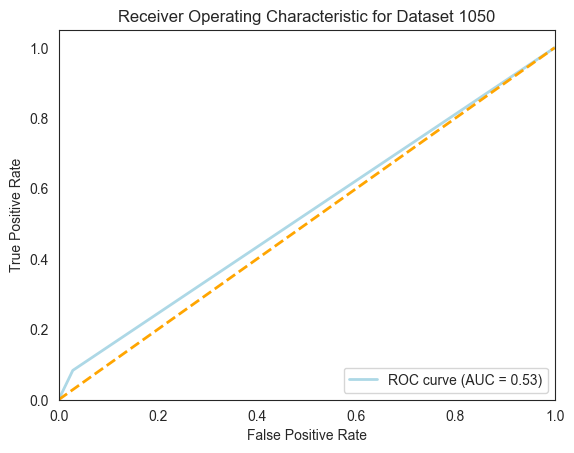

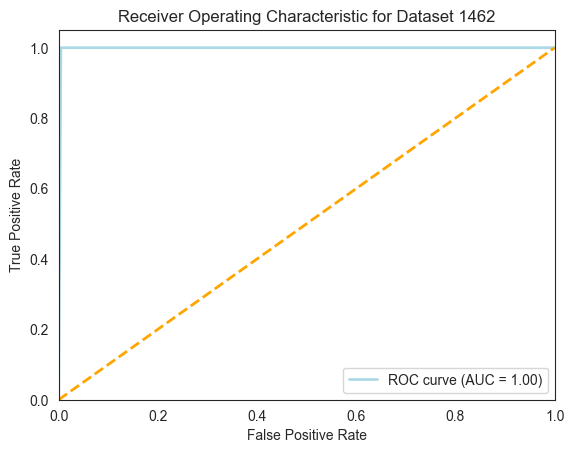

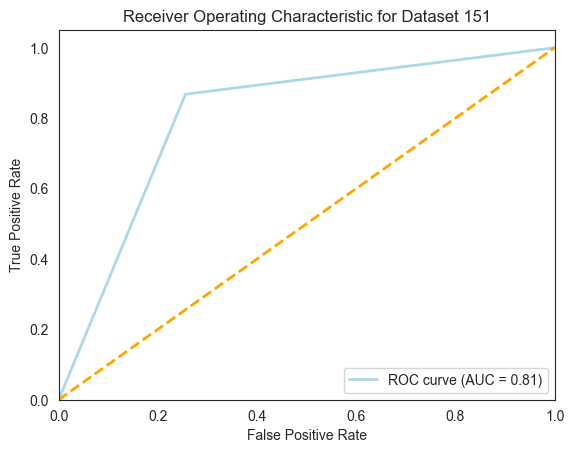

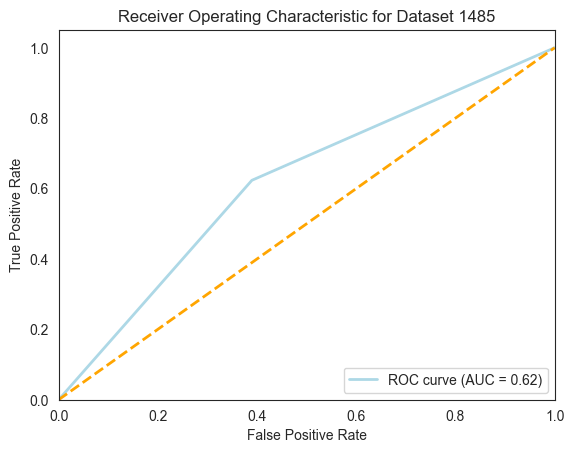

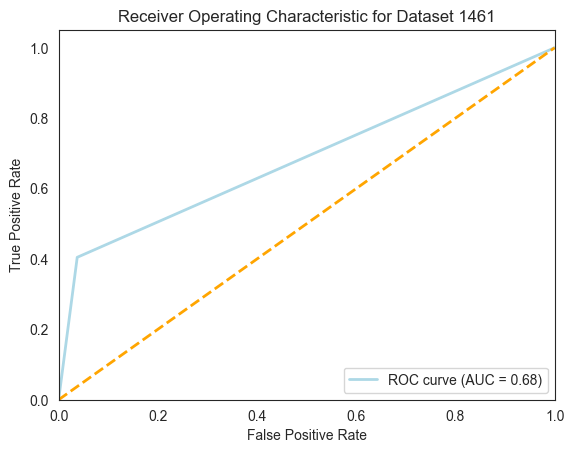

In [13]:
for id in dataframes:
    X = dataframes[id].drop(columns=['target'], axis=1)
    y = dataframes[id]['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)
    adaboost_rf = AdaBoost_RandomForest()
    adaboost_rf.fit(X_train, y_train)
    y_pred = adaboost_rf.predict(X_test)
    plot_roc_curve(y_test, y_pred, id)

#### Comparação dos resultados entre os diferentes modelos

In [9]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def run_cv(X, y, algs, nfolds=10, means_only=False):
    results = {}
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=1111)

    # Loop to accumulate results for each algorithm
    for algo_name, algo in algs:
        accuracies = []
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            algo.fit(X_train, y_train)
            y_pred = algo.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
        #print(f"Model: {algo_name} - Accuracy: {np.mean(accuracies)} - Outliers: {getattr(algo, 'get_number_of_outliers', lambda: 0)()}")
        
        results[algo_name] = {
            "accuracy": np.mean(accuracies),
            "outliers": getattr(algo, 'get_number_of_outliers', lambda: 0)()  # Default to 0 if method not present
        }

    # Convert results dictionary to a list of tuples
    return [(results[algo_name]['accuracy'], results[algo_name]['outliers'], algo_name) for algo_name in results]

In [10]:
import pandas as pd

models = [
    ("AdaBoost Local", AdaBoost()),
    ("AdaBoost Check Outliers 3", AdaBoost(check_outliers=True, outlier_threshold=3)),
    ("AdaBoost Check Outliers 5", AdaBoost(check_outliers=True, outlier_threshold=5)),
    ("AdaBoost Random Forest", AdaBoost_RandomForest())
]


def results_table(datasets, algs):
    column_names = [
        "ID",
        "N_outliers 3",
        "N_outliers 5",
        "Acc Adaboost",
        "Acc Outliers 3",
        "Acc Outliers 5",
        "Acc RandomForest",
        "Outliers 3 - Adaboost",
        "Outliers 5 - Adaboost",
        "RandomForest - Adaboost"
    ]

    data_list = []

    for id in datasets:  # Assuming datasets is a list of IDs
        X = dataframes[id].drop(columns=['target'], axis=1)
        y = dataframes[id]['target']
        results = run_cv(X, y, algs, means_only=True)  # Assuming this returns a list of tuples (accuracy, n_outliers, algo_name)

        data = {}
        
        for accuracy, n_outliers, algo_name in results:

            if algo_name == 'AdaBoost Local':
            
                data.update({
                    "Acc Adaboost": accuracy,
                    "ID": id
                })
            elif algo_name == 'AdaBoost Check Outliers 3':
                data.update({
                    "Acc Outliers 3": accuracy,
                    "N_outliers 3": n_outliers
                })
            elif algo_name == 'AdaBoost Check Outliers 5':
                data.update({
                    "Acc Outliers 5": accuracy,
                    "N_outliers 5": n_outliers
                })
                
            elif algo_name == 'AdaBoost Random Forest':
                data.update({
                    "Acc RandomForest": accuracy
                })
        
        data.update({
            "Outliers 3 - Adaboost": data["Acc Outliers 3"] - data["Acc Adaboost"],
            "Outliers 5 - Adaboost": data["Acc Outliers 5"] - data["Acc Adaboost"],
            "RandomForest - Adaboost": data["Acc RandomForest"] - data["Acc Adaboost"],
        })

        data_list.append(data)
        print(f"Dataset:{id} done!")
    results_table = pd.DataFrame(data_list, columns=column_names)
    return results_table


table = results_table(dataframes, models)

Dataset:1464 done!
Dataset:1067 done!
Dataset:1467 done!
Dataset:1504 done!
Dataset:1494 done!
Dataset:1068 done!
Dataset:1471 done!
Dataset:44 done!
Dataset:1046 done!
Dataset:1050 done!
Dataset:1462 done!
Dataset:151 done!
Dataset:1485 done!
Dataset:1461 done!


In [11]:
table

ID  N_outliers 3  N_outliers 5  Acc Adaboost  Acc Outliers 3  \
0   1464            21             5      0.767333        0.762036   
1   1067           171            60      0.848271        0.840210   
2   1467             1             0      0.911111        0.914815   
3   1504           320            41      0.779474        0.754301   
4   1494           305           130      0.821779        0.812219   
5   1068           100            31      0.931450        0.926929   
6   1471           312             6      0.664152        0.667490   
7     44          2243          1133      0.876770        0.875893   
8   1046           422            87      0.934191        0.934513   
9   1050           219            60      0.897632        0.895068   
10  1462            12             0      0.967190        0.965001   
11   151           559           121      0.760240        0.767832   
12  1485          1863             3      0.551538        0.541154   
13  1461          5509          1692      0.887262        0.885691   

    Acc Outliers 5  Acc RandomForest  Outliers 3 - Adaboost  \
0         0.767333          0.782198              -0.005297   
1         0.850169          0.856795              -0.008061   
2         0.911111          0.903704               0.003704   
3         0.742419          1.000000              -0.025173   
4         0.816110          0.867260              -0.009560   
5         0.928739          0.930565              -0.004521   
6         0.664820          0.785781               0.003338   
7         0.881336          0.943491              -0.000877   
8         0.934448          0.938629               0.000322   
9         0.898910          0.883566              -0.002564   
10        0.964286          0.998540              -0.002190   
11        0.767545          0.815898               0.007592   
12        0.520769          0.608846              -0.010385   
13        0.887815          0.900799              -0.001570   

    Outliers 5 - Adaboost  RandomForest - Adaboost  
0           -1.110223e-16                 0.014865  
1            1.897991e-03                 0.008524  
2            0.000000e+00                -0.007407  
3           -3.705525e-02                 0.220526  
4           -5.669362e-03                 0.045481  
5           -2.710893e-03                -0.000885  
6            6.675567e-04                 0.121629  
7            4.566161e-03                 0.066722  
8            2.571933e-04                 0.004438  
9            1.277968e-03                -0.014066  
10          -2.903840e-03                 0.031350  
11           7.305085e-03                 0.055659  
12          -3.076923e-02                 0.057308  
13           5.529848e-04                 0.013537

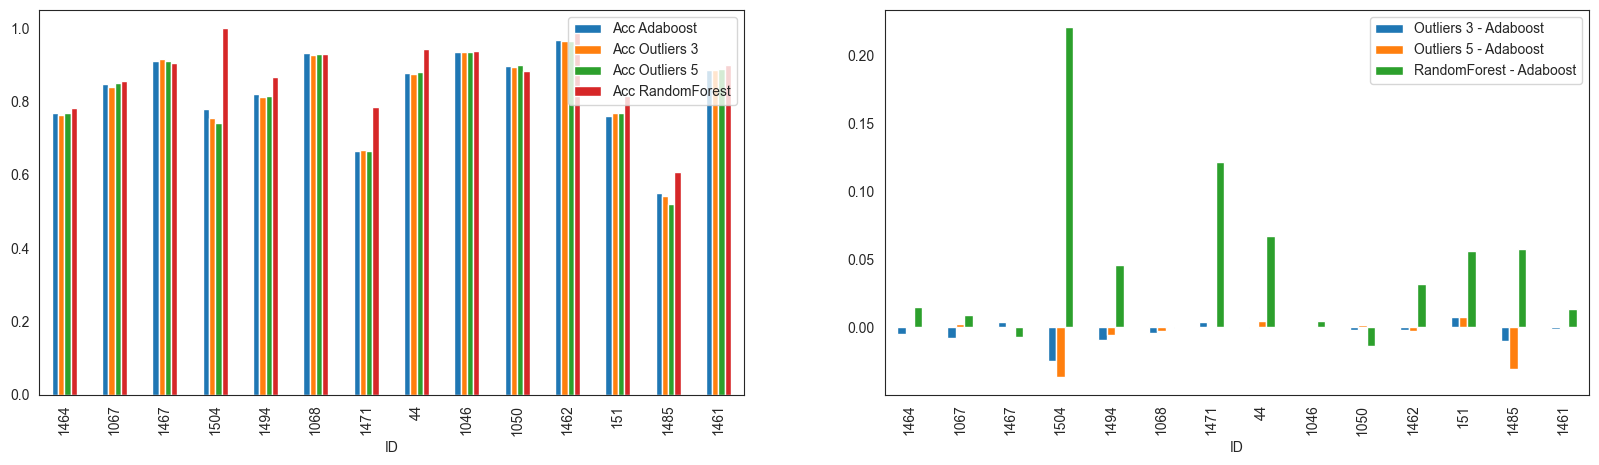

In [23]:
# plot results

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

table.plot(x='ID', y=['Acc Adaboost', 'Acc Outliers 3', 'Acc Outliers 5', 'Acc RandomForest'], kind='bar', ax=ax[0])
table.plot(x='ID', y=['Outliers 3 - Adaboost', 'Outliers 5 - Adaboost', 'RandomForest - Adaboost'], kind='bar', ax=ax[1])



# background color white

fig.patch.set_facecolor('white')

plt.show()